<a href="https://colab.research.google.com/github/SolPalominoH/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests

url="https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

response = requests.get(url)
datos = response.json()
telecom_X = pd.DataFrame(datos)
telecom_X.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [296]:
#Organizar tabla
df_tabla = pd.json_normalize(datos)
df_tabla.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [297]:
#tipos de datos
df_tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [298]:
#valores unicos por columna
for col in df_tabla.columns:
  print(f"valores únicos en la columna'{col}': {df_tabla[col].nunique()}")
  print(df_tabla[col].unique())
  print('-' * 50)

valores únicos en la columna'customerID': 7267
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------------------------------------
valores únicos en la columna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.tenure': 73
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 5

In [299]:
df_tabla.rename(columns={
    'customerID': 'ID',
    'Churn': 'abandono',
    'customer.gender': 'cliente_genero',
    'customer.SeniorCitizen': 'cliente_mayor_edad',
    'customer.Partner': 'cliente_tiene_pareja',
    'customer.Dependents': 'cliente_dependientes',
    'customer.tenure': 'cliente_antiguedad',
    'phone.PhoneService': 'telefono_servicio',
    'phone.MultipleLines': 'telefono_lineas_adicionales',
    'internet.InternetService': 'internet_servicio',
    'internet.OnlineSecurity': 'internet_seguridad',
    'internet.OnlineBackup': 'internet_respaldo',
    'internet.DeviceProtection': 'internet_proteccion_dispositivo',
    'internet.TechSupport': 'internet_soporte_tecnico',
    'internet.StreamingTV': 'internet_tv',
    'internet.StreamingMovies': 'internet_peliculas',
    'account.Contract': 'cuenta_contrato',
    'account.PaperlessBilling': 'cuenta_sin_papel',
    'account.PaymentMethod': 'cuenta_metodo_pago',
    'account.Charges.Monthly': 'cuenta_mensual',
    'account.Charges.Total': 'cuenta_total'
}, inplace=True)


In [300]:
#Nulos
print("\nValores nulos por columna:\n")
print(df_tabla.isnull().sum())


Valores nulos por columna:

ID                                 0
abandono                           0
cliente_genero                     0
cliente_mayor_edad                 0
cliente_tiene_pareja               0
cliente_dependientes               0
cliente_antiguedad                 0
telefono_servicio                  0
telefono_lineas_adicionales        0
internet_servicio                  0
internet_seguridad                 0
internet_respaldo                  0
internet_proteccion_dispositivo    0
internet_soporte_tecnico           0
internet_tv                        0
internet_peliculas                 0
cuenta_contrato                    0
cuenta_sin_papel                   0
cuenta_metodo_pago                 0
cuenta_mensual                     0
cuenta_total                       0
dtype: int64


In [301]:
#Duplicados
print("\nNúmero de filas duplicadas:", df_tabla.duplicated().sum())



Número de filas duplicadas: 0


In [302]:
#Unicos
print("\nValores Unicos:\n")
df_tabla.nunique()


Valores Unicos:



,0
ID,7267
abandono,3
cliente_genero,2
cliente_mayor_edad,2
cliente_tiene_pareja,2
cliente_dependientes,2
cliente_antiguedad,73
telefono_servicio,2
telefono_lineas_adicionales,3
internet_servicio,3


In [303]:
#Valores en bblanco o String vacios
df_tabla.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
ID,0
abandono,224
cliente_genero,0
cliente_mayor_edad,0
cliente_tiene_pareja,0
cliente_dependientes,0
cliente_antiguedad,0
telefono_servicio,0
telefono_lineas_adicionales,0
internet_servicio,0


In [304]:
#Convertir columna a numérico y eliminar filas inválidas
df_tabla['cuenta_total'] = pd.to_numeric(df_tabla['cuenta_total'], errors='coerce')
df_tabla = df_tabla.dropna(subset=['cuenta_total'])

#Limpiar 'Churn'
df_tabla = df_tabla[df_tabla['abandono'].notna() & (df_tabla['abandono'].str.strip() != '')]

#Diagnostico de vacios
empty_counts = (df_tabla.astype(str).apply(lambda col: col.str.strip().eq(''))).sum()
print("Valores vacíos detectados (además de NaN):\n", empty_counts)

Valores vacíos detectados (además de NaN):
 ID                                 0
abandono                           0
cliente_genero                     0
cliente_mayor_edad                 0
cliente_tiene_pareja               0
cliente_dependientes               0
cliente_antiguedad                 0
telefono_servicio                  0
telefono_lineas_adicionales        0
internet_servicio                  0
internet_seguridad                 0
internet_respaldo                  0
internet_proteccion_dispositivo    0
internet_soporte_tecnico           0
internet_tv                        0
internet_peliculas                 0
cuenta_contrato                    0
cuenta_sin_papel                   0
cuenta_metodo_pago                 0
cuenta_mensual                     0
cuenta_total                       0
dtype: int64


In [305]:
# Ver columnas con valores de tipo texto
for col in df_tabla.columns:
    if df_tabla[col].dtype == "object":
        print(col, df_tabla[col].unique()[:10])  # muestra primeros valores únicos


#convertir a string por seguridad y normalizar espacios
#df_tabla = df_tabla.astype(str).apply(lambda x: x.str.strip())

#Reemplazar en TODO el DataFrame
#df_tabla = df_tabla.replace({
  #  'Yes': 1, 'No': 0,
 #   'SI': 1, 'Si': 1, 'si': 1,
#    'NO': 0, 'No': 0, 'no': 0
#})
#df_tabla.head()

ID ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']
abandono ['No' 'Yes']
cliente_genero ['Female' 'Male']
cliente_tiene_pareja ['Yes' 'No']
cliente_dependientes ['Yes' 'No']
telefono_servicio ['Yes' 'No']
telefono_lineas_adicionales ['No' 'Yes' 'No phone service']
internet_servicio ['DSL' 'Fiber optic' 'No']
internet_seguridad ['No' 'Yes' 'No internet service']
internet_respaldo ['Yes' 'No' 'No internet service']
internet_proteccion_dispositivo ['No' 'Yes' 'No internet service']
internet_soporte_tecnico ['Yes' 'No' 'No internet service']
internet_tv ['Yes' 'No' 'No internet service']
internet_peliculas ['No' 'Yes' 'No internet service']
cuenta_contrato ['One year' 'Month-to-month' 'Two year']
cuenta_sin_papel ['Yes' 'No']
cuenta_metodo_pago ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [306]:
# Normalizar valores antes de convertir
df_tabla = df_tabla.replace({
    "No internet service": "No",
    "No phone service": "No",
    "": "No"   # para los casos vacíos en abandono
})

# Definir columnas binarias
yes_no_cols = [
    "abandono", "cliente_tiene_pareja", "cliente_dependientes",
    "telefono_servicio", "telefono_lineas_adicionales",
    "internet_seguridad", "internet_respaldo",
    "internet_proteccion_dispositivo", "internet_soporte_tecnico",
    "internet_tv", "internet_peliculas", "cuenta_sin_papel"
]

# Convertir a 0 y 1
for col in yes_no_cols:
    df_tabla[col] = df_tabla[col].map({"Yes": 1, "No": 0})

df_tabla

,ID,abandono,cliente_genero,cliente_mayor_edad,cliente_tiene_pareja,cliente_dependientes,cliente_antiguedad,telefono_servicio,telefono_lineas_adicionales,internet_servicio,...,internet_respaldo,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_tv,internet_peliculas,cuenta_contrato,cuenta_sin_papel,cuenta_metodo_pago,cuenta_mensual,cuenta_total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [307]:
df_tabla.describe()

,abandono,cliente_mayor_edad,cliente_tiene_pareja,cliente_dependientes,cliente_antiguedad,telefono_servicio,telefono_lineas_adicionales,internet_seguridad,internet_respaldo,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_tv,internet_peliculas,cuenta_sin_papel,cuenta_mensual,cuenta_total
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000


#📊 Carga y análisis

In [308]:
#Crear columna cuentas_diarias
df_tabla["cuentas_diarias"]=df_tabla["cuenta_mensual"]/30
#hacer un sample de las columnas total_mensal y cuentas_diarias
df_tabla.sample(5)[['cuenta_mensual','cuentas_diarias']]

,cuenta_mensual,cuentas_diarias
2719,74.70,2.490000
1009,89.30,2.976667
5304,44.45,1.481667
2454,71.00,2.366667
1703,19.80,0.660000


ANALISIS DESCRIPTIVO

In [309]:
#resumen general de todas las columnas numericas
resumen = df_tabla.describe().T
resumen["mediana"] = df_tabla.median(numeric_only=True)
resumen["varianza"] = df_tabla.var(numeric_only=True)
resumen["desviacion_std"] = df_tabla.std(numeric_only=True)

print("Análisis Descriptivo General:")
print(resumen)

# Distribución de gasto mensual
print("\nDistribución del gasto mensual (cuenta_mensual):")
print("Media:", df_tabla["cuenta_mensual"].mean())
print("Mediana:", df_tabla["cuenta_mensual"].median())
print("Desviación estándar:", df_tabla["cuenta_mensual"].std())
print("Valor mínimo:", df_tabla["cuenta_mensual"].min())
print("Valor máximo:", df_tabla["cuenta_mensual"].max())

# Distribución de gasto total
print("\nDistribución del gasto total (cuenta_total):")
print("Media:", df_tabla["cuenta_total"].mean())
print("Mediana:", df_tabla["cuenta_total"].median())
print("Desviación estándar:", df_tabla["cuenta_total"].std())
print("Valor mínimo:", df_tabla["cuenta_total"].min())
print("Valor máximo:", df_tabla["cuenta_total"].max())

# Antigüedad de los clientes
print("\nAntigüedad de los clientes (meses):")
print("Media:", df_tabla["cliente_antiguedad"].mean())
print("Mediana:", df_tabla["cliente_antiguedad"].median())
print("Desviación estándar:", df_tabla["cliente_antiguedad"].std())
print("Valor mínimo:", df_tabla["cliente_antiguedad"].min())
print("Valor máximo:", df_tabla["cliente_antiguedad"].max())

# Relación con el abandono
abandono_counts = df_tabla["abandono"].value_counts(normalize=True) * 100
print("\nTasa de abandono de clientes:")
print(abandono_counts)


Análisis Descriptivo General:
                                  count         mean          std        min  \
abandono                         7032.0     0.265785     0.441782   0.000000   
cliente_mayor_edad               7032.0     0.162400     0.368844   0.000000   
cliente_tiene_pareja             7032.0     0.482509     0.499729   0.000000   
cliente_dependientes             7032.0     0.298493     0.457629   0.000000   
cliente_antiguedad               7032.0    32.421786    24.545260   1.000000   
telefono_servicio                7032.0     0.903299     0.295571   0.000000   
telefono_lineas_adicionales      7032.0     0.421928     0.493902   0.000000   
internet_seguridad               7032.0     0.286547     0.452180   0.000000   
internet_respaldo                7032.0     0.344852     0.475354   0.000000   
internet_proteccion_dispositivo  7032.0     0.343857     0.475028   0.000000   
internet_soporte_tecnico         7032.0     0.290102     0.453842   0.000000   
internet_t

/tmp/ipython-input-1167970079.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


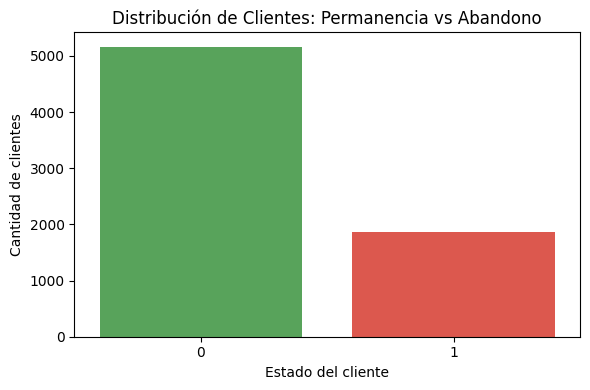

In [327]:
#Garfico permanencia  vs abandono
abandono_counts = df_tabla['abandono'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(
    x=abandono_counts.index,
    y=abandono_counts.values,
    palette=['#4CAF50', '#F44336']
)
plt.title("Distribución de Clientes: Permanencia vs Abandono")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Estado del cliente")
plt.tight_layout()
plt.savefig("distribucion_permanencia_vs_abandono_barra.png")
plt.show()


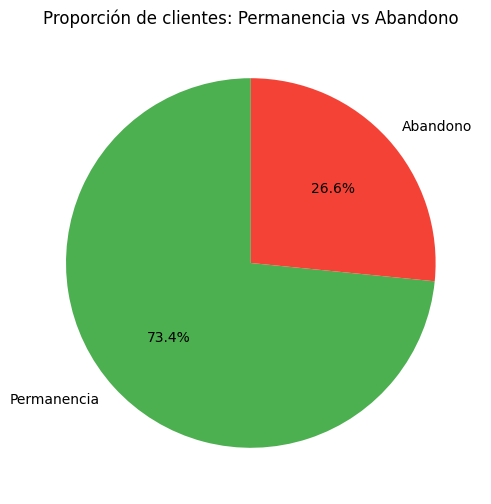

In [325]:
#Porcentaje proporcion de clientes
abandono_counts = df_tabla["abandono"].value_counts(normalize=True) * 100

plt.figure(figsize=(6,6))
plt.pie(abandono_counts, labels=["Permanencia", "Abandono"], autopct="%1.1f%%", startangle=90, colors=['#4CAF50', '#F44336'])
plt.title("Proporción de clientes: Permanencia vs Abandono")
plt.show()

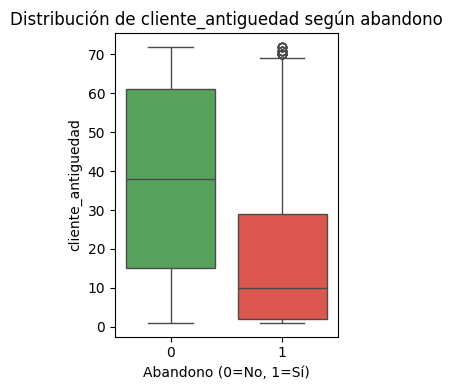

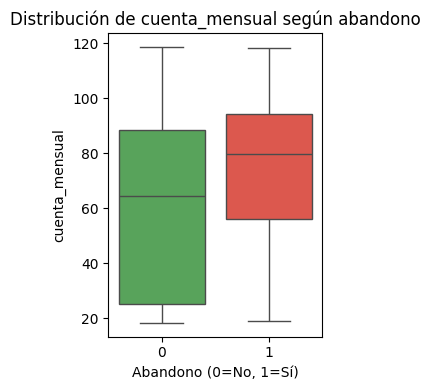

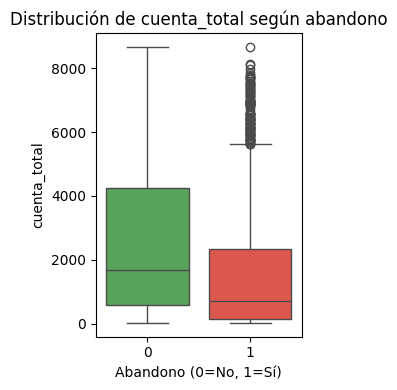

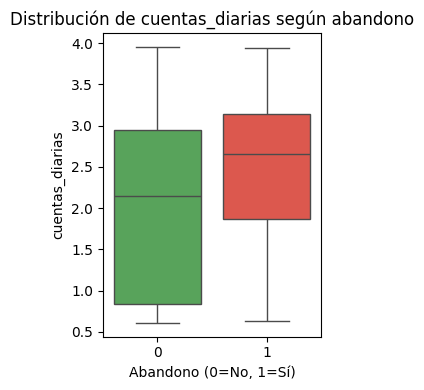

In [324]:
variables_numericas = ['cliente_antiguedad', 'cuenta_mensual', 'cuenta_total', 'cuentas_diarias']

for var in variables_numericas:
    plt.figure(figsize=(3,4))
    sns.boxplot(
        x='abandono',
        y=var,
        hue='abandono',
        data=df_tabla,
        palette=['#4CAF50', '#F44336'],
        legend=False
    )
    plt.title(f"Distribución de {var} según abandono")
    plt.xlabel("Abandono (0=No, 1=Sí)")
    plt.ylabel(var)
    plt.tight_layout()
    plt.savefig(f"{var}_por_abandono.png")
    plt.show()

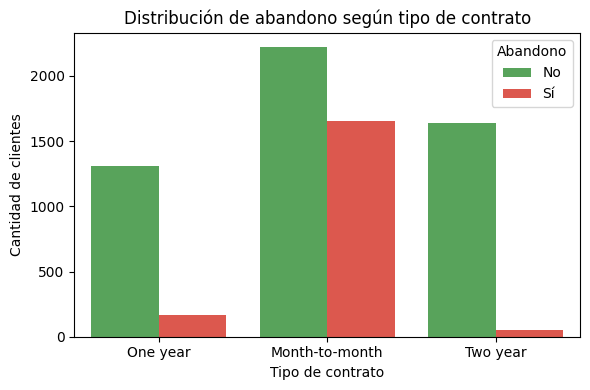

In [328]:
plt.figure(figsize=(6,4))
sns.countplot(x='cuenta_contrato', hue='abandono', data=df_tabla,
              palette=['#4CAF50', '#F44336'])
plt.title("Distribución de abandono según tipo de contrato")
plt.xlabel("Tipo de contrato")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Abandono", labels=["No", "Sí"])
plt.tight_layout()
plt.show()


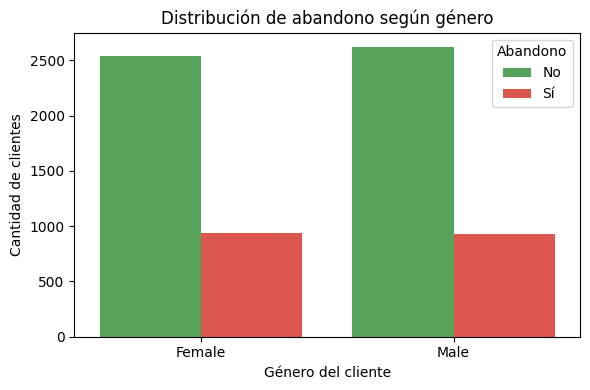

In [330]:
plt.figure(figsize=(6,4))
sns.countplot(x='cliente_genero', hue='abandono', data=df_tabla,
              palette=['#4CAF50', '#F44336'])
plt.title("Distribución de abandono según género")
plt.xlabel("Género del cliente")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Abandono", labels=["No", "Sí"])
plt.tight_layout()
plt.savefig("abandono_vs_genero.png")
plt.show()


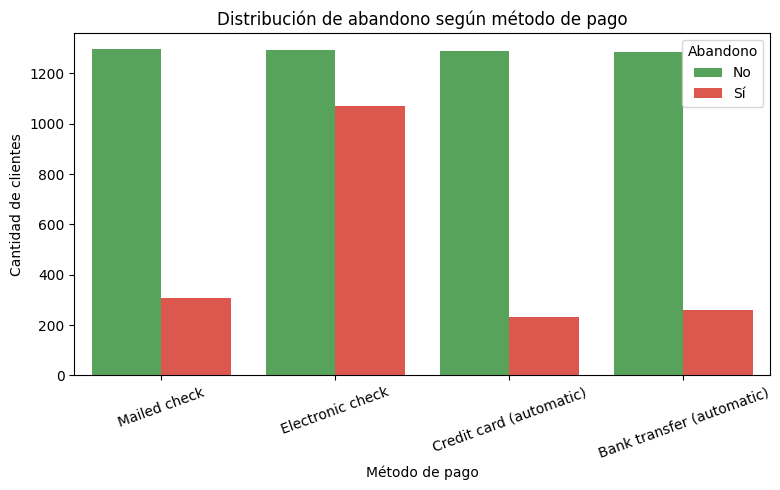

In [331]:
plt.figure(figsize=(8,5))
sns.countplot(x='cuenta_metodo_pago', hue='abandono', data=df_tabla,
              palette=['#4CAF50', '#F44336'])
plt.title("Distribución de abandono según método de pago")
plt.xlabel("Método de pago")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=20)  # para que no se encimen las etiquetas
plt.legend(title="Abandono", labels=["No", "Sí"])
plt.tight_layout()
plt.savefig("abandono_vs_metodo_pago.png")
plt.show()


In [354]:
# Estilo general para el infomre
sns.set_theme(style="whitegrid", context="talk")
df = df_tabla if 'datos_telecom_x' in globals() else df_tabla.copy()

#Mapear nombres que podrían variar
col_abandono = 'abandono'
col_genero   = 'cliente_genero'
col_pago     = 'cuenta_metodo_pago'
col_contrato = 'cuenta_contrato'
col_tenure   = 'cliente_antiguedad'
col_mensual  = 'cuenta_mensual' if 'cuenta_mensual' in df.columns else 'cuenta_cargo_mensual'
col_total    = 'cuenta_total'   if 'cuenta_total'   in df.columns else 'cuenta_cargo_total'

# Asegurar tipos
df[col_abandono] = pd.to_numeric(df[col_abandono], errors='coerce').fillna(0).astype(int)
for c in [col_tenure, col_mensual, col_total]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# Helper: anotar porcentajes encima de barras
def annotate_percent(ax, total=None, fmt="{:.1f}%"):
    if total is None:
        total = np.sum([p.get_height() for p in ax.patches])  # no siempre conviene; mejor pasar total explícito
    for p in ax.patches:
        h = p.get_height()
        if h > 0:
            ax.annotate(fmt.format(100*h/total),
                        (p.get_x()+p.get_width()/2, h),
                        ha='center', va='bottom', fontsize=10, xytext=(0,5), textcoords='offset points')

# Helper: tasa de abandono por categoría (DataFrame ordenado)
def churn_rate_by_category(df, cat_col, churn_col=col_abandono):
    tmp = (df.groupby(cat_col)[churn_col]
             .agg(['mean','count'])
             .rename(columns={'mean':'churn_rate','count':'n'})
             .sort_values('churn_rate', ascending=False))
    return (tmp*1).reset_index()

#📄Informe final

**🔹 Introducción**

El presente análisis tiene como objetivo comprender el comportamiento de evasión de clientes (Churn) en una empresa de telecomunicaciones. La evasión, o churn, se refiere a los clientes que deciden cancelar el servicio.
Este fenómeno impacta directamente la rentabilidad del negocio, ya que la adquisición de nuevos clientes suele ser más costosa que la retención de los actuales.
A través de este estudio, buscamos identificar patrones y factores asociados con la decisión de los clientes de permanecer o abandonar, con el fin de orientar acciones estratégicas que permitan reducir la tasa de churn.



**🔹 Limpieza y Tratamiento de Datos**

La tasa de abandono representa un desafío crítico, ya que captar un nuevo cliente suele ser mucho más costoso que retener a uno existente.

En este conjunto de datos encontramos que:

*   El 26.6% de los clientes han abandonado el servicio.
*   El 73.4% se han mantenido activos.

Esto refleja que, aunque la mayoría de clientes permanecen, más de 1 de cada 4 se da de baja, lo que implica un problema importante de retención.

Para llegar a esos resultados se realizo llo siguiente:
*   Se imputaron valores nulos en las variables numéricas con la mediana.

*   Las variables categóricas con respuestas “Sí/No” fueron transformadas a binario (1 = Sí, 0 = No).

*   Se reemplazaron los valores faltantes en variables financieras por 0, evitando distorsiones en los análisis.

*   Se ajustaron tipos de datos para asegurar que las variables numéricas pudieran analizarse correctamente.





**🔹 Análisis Exploratorio de Datos**

El 26.6% de los clientes han abandonado el servicio, mientras que el 73.4% se mantienen activos. Aunque la mayoría permanece, la tasa de evasión es significativa y representa un reto importante para la retención.

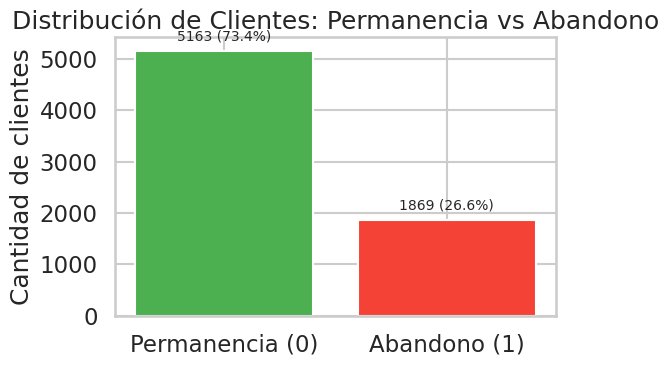

In [370]:
fig, ax = plt.subplots(figsize=(6,4))
counts = df_tabla['abandono'].value_counts().sort_index()  # 0,1
labels = ['Permanencia (0)', 'Abandono (1)']
bars = ax.bar(labels, counts.values)
ax.set_title("Distribución de Clientes: Permanencia vs Abandono")
ax.set_ylabel("Cantidad de clientes")
colors = ['#4CAF50', '#F44336']  # verde y rojo
bars = ax.bar(labels, counts.values, color=colors)

# Anotar % encima de cada barra
total = counts.sum()
for rect, val in zip(bars, counts.values):
    ax.annotate(f"{val} ({val/total*100:.1f}%)",
                (rect.get_x()+rect.get_width()/2, rect.get_height()),
                ha='center', va='bottom', fontsize=10, xytext=(0,5), textcoords='offset points')
plt.tight_layout()
plt.show()



El abandono es muy similar entre hombres y mujeres, lo que indica que el género no es un factor determinante en la decisión de cancelar el servicio.

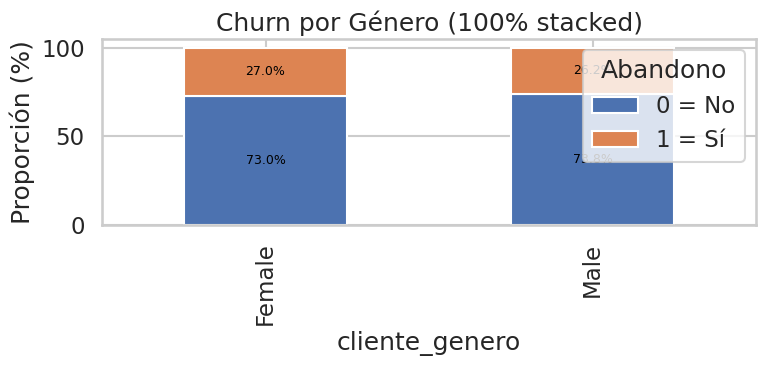

/tmp/ipython-input-1460933384.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


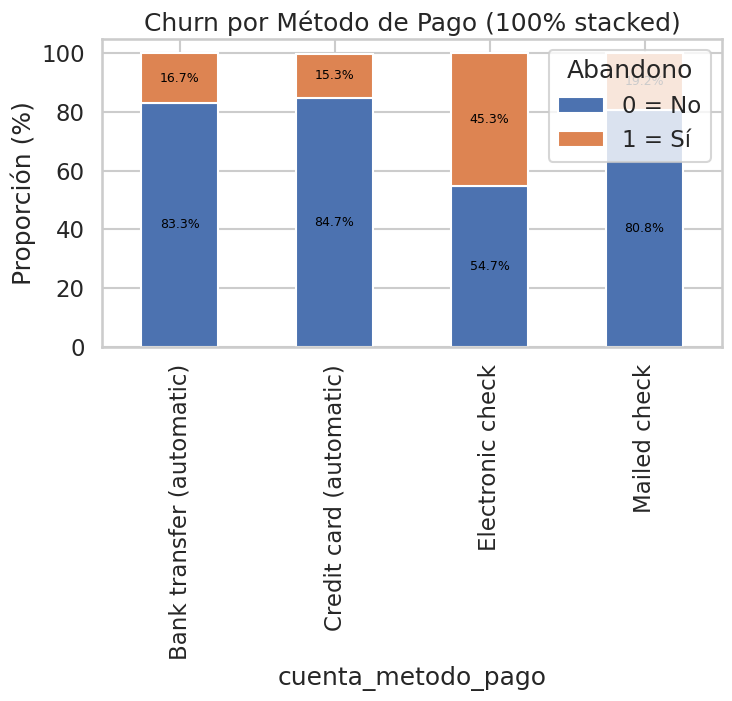

In [365]:
def stacked_100(df, cat_col, churn_col=col_abandono, title=""):
    ct = pd.crosstab(df[cat_col], df[churn_col], normalize='index') * 100
    # asegurar columnas 0 y 1
    for c in [0,1]:
        if c not in ct.columns:
            ct[c] = 0.0
    ct = ct[[0,1]]  # orden: permanencia, abandono

    ax = ct.plot(kind='bar', stacked=True, figsize=(8,4))
    ax.set_title(title)
    ax.set_xlabel(cat_col)
    ax.set_ylabel("Proporción (%)")
    ax.legend(title="Abandono", labels=["0 = No", "1 = Sí"], loc='upper right')
    # anotar % sobre cada segmento (opcional dejar solo abandono)
    for cidx, c in enumerate(ct.columns):
        for ridx, v in enumerate(ct[c]):
            if v > 0:
                ax.annotate(f"{v:.1f}%",
                            (ridx, ct.iloc[:ridx+1, :cidx+1].sum(axis=1).iloc[ridx]-v/2),
                            ha='center', va='center', fontsize=9, color="black")
    plt.tight_layout()
    plt.show()

stacked_100(df, col_genero, title="Churn por Género (100% stacked)")
stacked_100(df, col_pago,   title="Churn por Método de Pago (100% stacked)")

Los clientes que utilizan Electronic check presentan un abandono significativamente mayor que aquellos que pagan mediante tarjeta de crédito, débito automático o transferencias bancarias.
Esto podría estar asociado a incomodidad en el método de pago o falta de fidelización automática, lo que convierte esta variable en un predictor clave del churn.

Electronic Check es el método más riesgoso (45%).
Métodos automáticos como tarjeta de crédito (15%) o transferencia bancaria (17%) tienen tasas mucho más bajas.

Conclusión: Los métodos automáticos facilitan la retención; Electronic Check debería ser desincentivado o acompañado de estrategias de fidelización.

/tmp/ipython-input-3596299613.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tmp, x=col_pago, y='churn_rate', ax=ax,
/tmp/ipython-input-3596299613.py:3: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(data=tmp, x=col_pago, y='churn_rate', ax=ax,


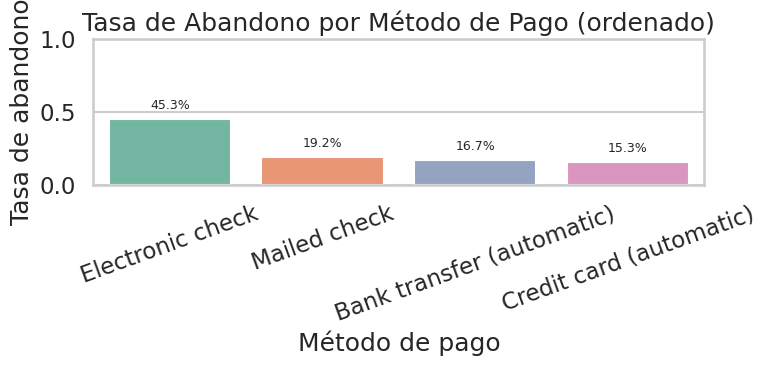

In [366]:
fig, ax = plt.subplots(figsize=(8,4))
tmp = churn_rate_by_category(df, col_pago)  # cambia por col_genero si quieres
sns.barplot(data=tmp, x=col_pago, y='churn_rate', ax=ax,
            order=tmp[col_pago].tolist(),
            palette=sns.color_palette("Set2"))
ax.set_title("Tasa de Abandono por Método de Pago (ordenado)")
ax.set_xlabel("Método de pago")
ax.set_ylabel("Tasa de abandono")
ax.set_ylim(0, 1)
# anotar %
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100:.1f}%", (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=9, xytext=(0,5), textcoords='offset points')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Tasa de Abandono por Rango de Antigüedad

El 53% de los clientes que tienen entre 0–6 meses abandonan.
A medida que pasa el tiempo, la tasa cae de manera progresiva hasta llegar a solo 6.6% en clientes con más de 5 años.

Existe un período crítico de onboarding; si la empresa logra retener al cliente los primeros meses, la probabilidad de permanencia a largo plazo aumenta mucho.

/tmp/ipython-input-831981721.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = (df.groupby(cat_col)[churn_col]
/tmp/ipython-input-2287061757.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tmp, x='_tenure_bin', y='churn_rate', ax=ax,


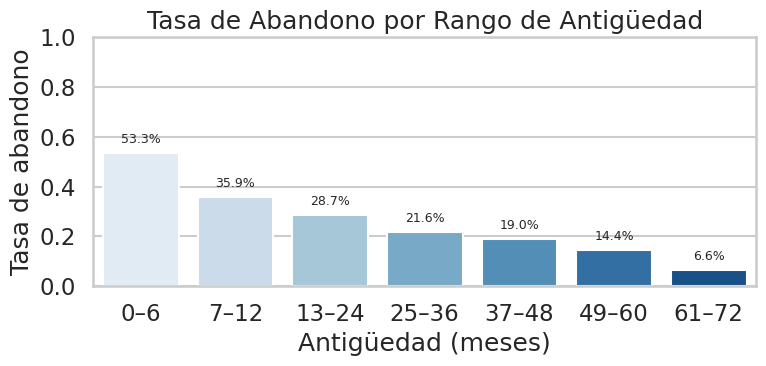

In [367]:
bins = [0, 6, 12, 24, 36, 48, 60, 72]
labels = ["0–6", "7–12", "13–24", "25–36", "37–48", "49–60", "61–72"]
df['_tenure_bin'] = pd.cut(df[col_tenure], bins=bins, labels=labels, include_lowest=True)

tmp = churn_rate_by_category(df, '_tenure_bin')
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=tmp, x='_tenure_bin', y='churn_rate', ax=ax,
            order=labels,
            palette=sns.color_palette("Blues", n_colors=len(labels)))
ax.set_title("Tasa de Abandono por Rango de Antigüedad")
ax.set_xlabel("Antigüedad (meses)")
ax.set_ylabel("Tasa de abandono")
ax.set_ylim(0, 1)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100:.1f}%", (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=9, xytext=(0,5), textcoords='offset points')
plt.tight_layout()
plt.show()


Los clientes que abandonan tienden a acumular menos gasto total que los que permanecen. Esto indica que quienes se van son clientes que no alcanzan una relación a largo plazo (por eso no acumulan tanto gasto).

El abandono ocurre en etapas tempranas, antes de que el cliente acumule un valor alto para la compañía.

Los clientes con cargos mensuales más altos presentan mayor probabilidad de abandonar. Se percibe un punto crítico alrededor de los 70–80 USD, donde la brecha entre permanencia y abandono es más clara.

Los precios altos generan fricción; probablemente haya sensibilidad al costo en la base de clientes.

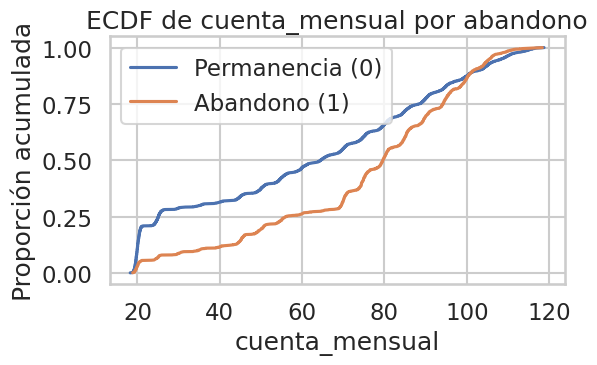

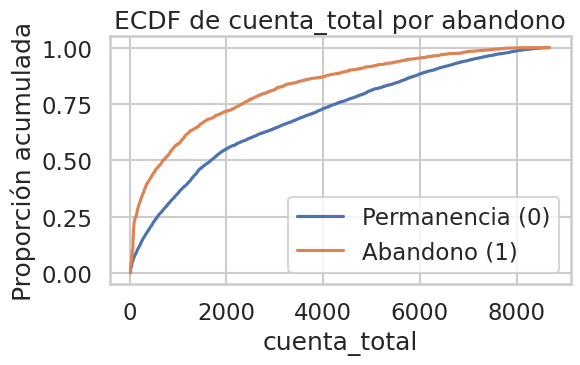

In [369]:
def ecdf(series):
    x = np.sort(series.dropna().values)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

for var in [col_mensual, col_total]:
    if var in df.columns:
        fig, ax = plt.subplots(figsize=(6,4))
        for g, name in [(0, "Permanencia (0)"), (1, "Abandono (1)")]:
            x, y = ecdf(df.loc[df[col_abandono]==g, var])
            ax.plot(x, y, label=name)
        ax.set_title(f"ECDF de {var} por abandono")
        ax.set_xlabel(var)
        ax.set_ylabel("Proporción acumulada")
        ax.legend()
        plt.tight_layout()
        plt.show()


**Interpretaciones clave:**

Churn global: La tasa de abandono es del 26.6%, es decir, aproximadamente uno de cada cuatro clientes deja el servicio.

Perfil de alto riesgo: El abandono se concentra en clientes con poca antigüedad (0–6 meses), especialmente cuando tienen contrato mensual y utilizan Electronic Check como método de pago.

Antigüedad: Los clientes con mayor tiempo de permanencia muestran una fuerte fidelidad, mientras que la deserción es más alta en los primeros meses de relación.

Cargos mensuales: Los clientes con cargos más elevados presentan mayor probabilidad de abandonar, lo que sugiere una sensibilidad al precio y una percepción insuficiente de valor frente al costo.

Cargos totales acumulados: Aquellos con bajo gasto total tienden a abandonar antes, lo que confirma que el churn ocurre en etapas tempranas del ciclo de vida del cliente.

Método de pago y contrato: Los contratos largos y los métodos automáticos de pago (tarjeta de crédito, débito automático, transferencia bancaria) se asocian con menores tasas de abandono, reflejando mayor estabilidad y compromiso.

**Recomendaciones Estratégicas**

Incentivar el uso de pagos automáticos mediante descuentos o beneficios adicionales.

Reducir dependencia del pago por Electronic Check.

Implementar programas de bienvenida y fidelización en los primeros 3 meses (soporte proactivo, beneficios exclusivos, seguimiento personalizado)

Ofrecer paquetes más flexibles o escalonados para clientes con cargos elevados.

Comunicar con claridad el valor agregado de los servicios premium.

Diseñar planes con descuentos atractivos para clientes que migren de contrato mensual a anual o bianual.

Implementar un modelo de predicción de churn para identificar clientes en riesgo antes de que abandonen.

Segmentar clientes según antigüedad, método de pago y cargos para diseñar campañas específicas de retención.


